In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
data=pd.read_csv('shampoo_sales.csv')
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [20]:
def parser(x):
  return datetime.strptime('190'+x,'%Y-%m')

series=pd.read_csv('shampoo_sales.csv',header=0,parse_dates=[0],index_col=0,date_parser=parser)
upsampled=series.resample('D')
print(series.head(32))

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3
1901-06-01  168.5
1901-07-01  231.8
1901-08-01  224.5
1901-09-01  192.8
1901-10-01  122.9
1901-11-01  336.5
1901-12-01  185.9
1902-01-01  194.3
1902-02-01  149.5
1902-03-01  210.1
1902-04-01  273.3
1902-05-01  191.4
1902-06-01  287.0
1902-07-01  226.0
1902-08-01  303.6
1902-09-01  289.9
1902-10-01  421.6
1902-11-01  264.5
1902-12-01  342.3
1903-01-01  339.7
1903-02-01  440.4
1903-03-01  315.9
1903-04-01  439.3
1903-05-01  401.3
1903-06-01  437.4
1903-07-01  575.5
1903-08-01  407.6


<ipython-input-20-d7b77130d1ee>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series=pd.read_csv('shampoo_sales.csv',header=0,parse_dates=[0],index_col=0,date_parser=parser)


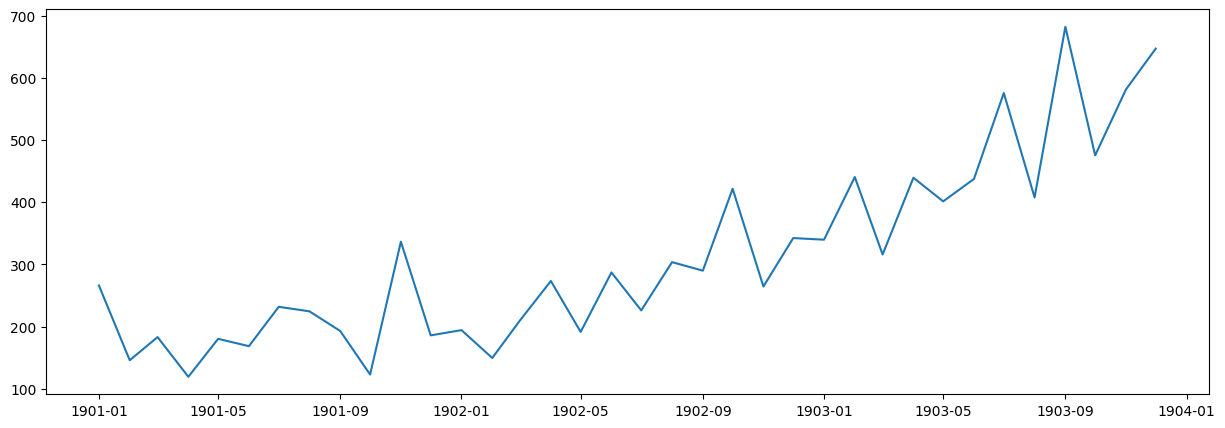

In [16]:
plt.figure(figsize=(15,5))
plt.plot(series)

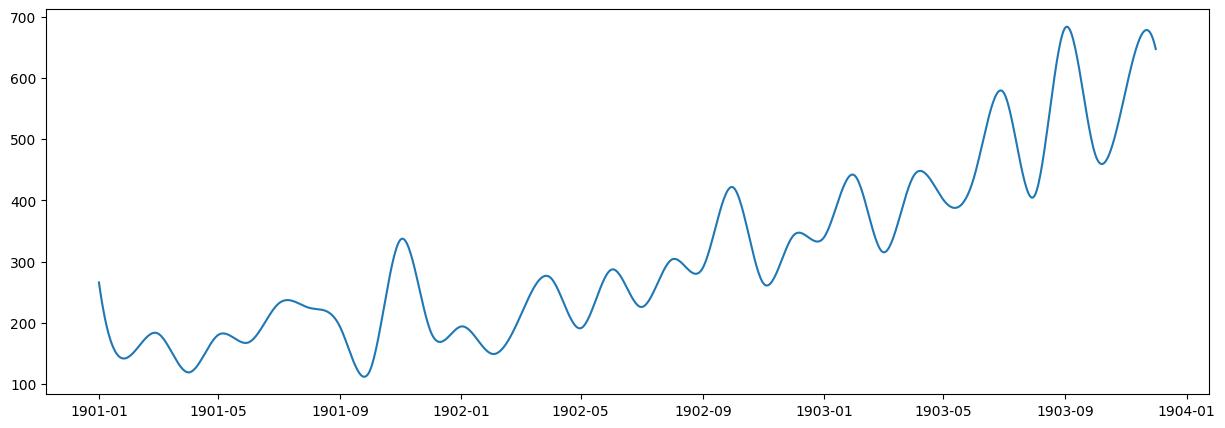

In [21]:
interpolated=upsampled.interpolate(method='cubic',order=2)
plt.figure(figsize=(15,5))
plt.plot(interpolated)

In [22]:
resample1=series.resample('Q')
qms=resample1.mean()
print(qms)

                 Sales
Month                 
1901-03-31  198.333333
1901-06-30  156.033333
1901-09-30  216.366667
1901-12-31  215.100000
1902-03-31  184.633333
1902-06-30  250.566667
1902-09-30  273.166667
1902-12-31  342.800000
1903-03-31  365.333333
1903-06-30  426.000000
1903-09-30  555.033333
1903-12-31  567.833333


<ipython-input-22-b78320d795bd>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resample1=series.resample('Q')


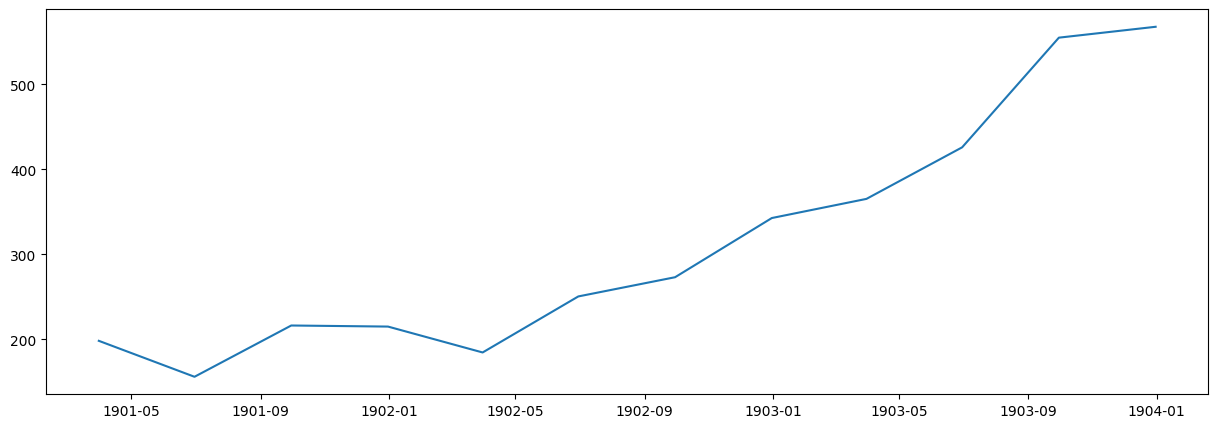

In [23]:
plt.figure(figsize=(15,5))
plt.plot(qms)

In [24]:
resample1=series.resample('A')
qms=resample1.mean()
print(qms)

                 Sales
Month                 
1901-12-31  196.458333
1902-12-31  262.791667
1903-12-31  478.550000


<ipython-input-24-6034a8427847>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  resample1=series.resample('A')


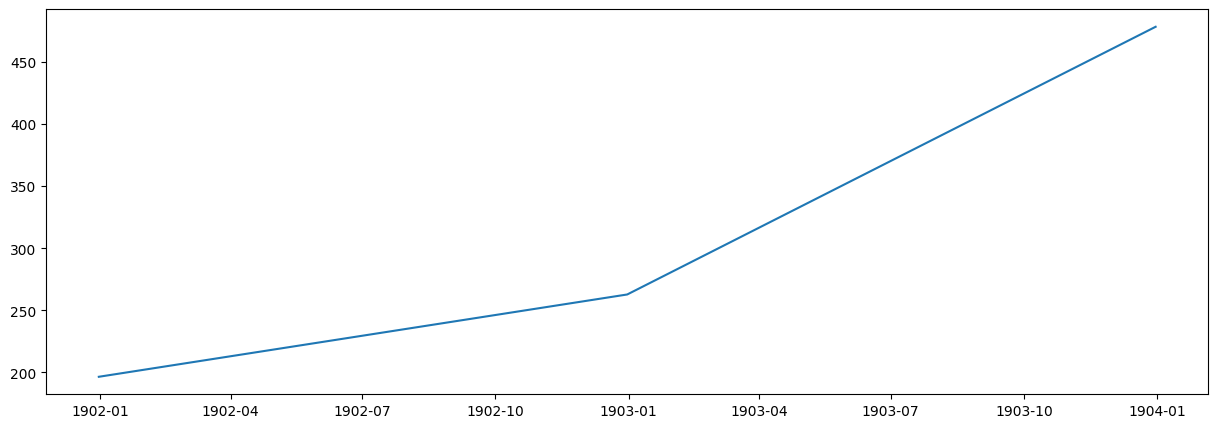

In [25]:
plt.figure(figsize=(15,5))
plt.plot(qms)